# get the data

In [273]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [11]:
full_regression_data = pickle.load( open( "full_regression_data.pkl", "rb" ) )

In [422]:
featureset = pickle.load( open( "featureset.pkl", "rb" ) )

In [423]:
featureset.columns

Index([u'num_weeks', u'jan', u'feb', u'mar', u'apr', u'may', u'jun', u'jul',
       u'aug', u'sep', u'oct', u'nov', u'high_theatre_count', u'diff_gross1',
       u'diff_gross2', u'diff_gross3', u'diff_gross4', u'diff_gross5',
       u'diff_gross6', u'diff_gross7', u'diff_gross8', u'diff_gross9',
       u'diff_gross10', u'diff_gross11', u'diff_theaters1', u'diff_theaters2',
       u'diff_theaters3', u'diff_theaters4', u'diff_theaters5',
       u'diff_theaters6', u'diff_theaters7', u'diff_theaters8',
       u'diff_theaters9', u'diff_theaters10', u'diff_theaters11',
       u'diff_rank1', u'diff_rank2', u'diff_rank3', u'diff_rank4',
       u'diff_rank5', u'diff_rank6', u'diff_rank7', u'diff_rank8',
       u'diff_rank9', u'diff_rank10', u'diff_rank11'],
      dtype='object')

# Filter the features by number of weeks that have happened

In [515]:
def filter_features_by_week(features,weeks_happened):
    feature_subset = features[features['num_weeks']>weeks_happened]
    target_cols = [np.array(range(weeks_happened-1))+(i*11+13) for i in range(0,3)]
    original_names = np.array(features.columns[:13])
    target_names = features.columns[list(np.concatenate(target_cols))]
    target_names = np.concatenate((original_names,target_names))
    feature_subset = feature_subset[target_names].dropna()
    y = feature_subset.pop('num_weeks').apply(np.log)
    return y,feature_subset

In [495]:
y.head()+2

0     4.197225
2     3.791759
6     3.386294
11    3.945910
13    3.386294
Name: num_weeks, dtype: float64

# Break data into train and test

In [516]:
y,X = filter_features_by_week(featureset,5)

In [517]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Further subest train into train and cross validation

In [500]:
def get_training_splits(X_train,folds=4):
    training_cv_splits = []
    kf = KFold(len(X_train),n_folds=folds,shuffle = True)
    for train_index, cv_index in kf:
        training_cv_splits.append((train_index,cv_index))
    return training_cv_splits

In [509]:
def grab_train_cv_data(y,X):
    cv = get_training_splits(X)
    return y.iloc[cv[0][0]],X.iloc[cv[0][0]],y.iloc[cv[0][1]],X.iloc[cv[0][1]]

In [519]:
y_cv1 , X_cv1 = grab_train_cv_data(X_train,y_train)

ValueError: too many values to unpack

# Iterating through possible start weeks, more or less information comparison

In [521]:
for i in range(2,13):
    y,X = filter_features_by_week(featureset,i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    y_cv_train,X_cv_train,y_cv_test,X_cv_test = grab_train_cv_data(y_train,X_train)
    rgr = linear_model.LinearRegression()
    rgr.fit(X_cv_train,y_cv_train)
    pred_train, pred_test = rgr.predict(X_cv_train),rgr.predict(X_cv_test)
    print rgr.score(X_cv_train,y_cv_train), rgr.score(X_cv_test,y_cv_test)
    print mean_squared_error(y_cv_train, pred_train), mean_squared_error(y_cv_test, pred_test)
    print ''

0.232208930702 0.226602071554
0.295694590957 0.309091953198

0.252060875665 0.24469841542
0.211284385506 0.210147559705

0.270596904091 0.279151824301
0.158397554217 0.145755413617

0.305003561237 0.269639178404
0.118902170316 0.125833340322

0.315850347407 0.30917041107
0.0951652537439 0.0959418007542

0.3171255675 0.323196224666
0.0782849280055 0.0730063599678

0.339479518541 0.283857994734
0.0621023616739 0.0671809923881

0.333386116586 0.299827082244
0.052018357711 0.0501799353379

0.333772286017 0.279779322531
0.0456099395188 0.0446388290321

0.356515126281 0.278161874181
0.0370503052743 0.0383781104709

0.314301827444 0.309443185261
0.0327797209043 0.0347989862533



# Running on Test Data with Full training set

In [ ]:
# X_train, X_test, y_train, y_test

In [525]:
model_comparison = {}
for i in range(2,13):
    y,X = filter_features_by_week(featureset,i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    rgr = linear_model.LinearRegression()
    rgr.fit(X_train,y_train)
    pred_test = rgr.predict(X_test)
    model_comparison[i] = {'y':y_test,'yhat':pred_test,
                           'mse':mean_squared_error(y_test, pred_test),
                           'score':rgr.score(X_test,y_test)}

    

In [527]:
from pprint import pprint 
pprint (model_comparison)

{2: {'mse': 0.29122010914630519,
     'score': 0.22064991806208423,
     'y': 2696    1.791759
5747    2.397895
8022    2.944439
7181    1.609438
1857    3.044522
3882    2.639057
1819    1.098612
177     1.791759
792     1.791759
957     1.945910
2797    1.791759
3542    1.609438
5039    1.386294
277     1.098612
4559    1.945910
4440    1.609438
1774    1.945910
8036    1.945910
6325    1.098612
2409    2.079442
5992    1.791759
5484    1.098612
3586    2.772589
2824    1.609438
2707    2.564949
1365    1.098612
2166    1.791759
4925    1.945910
2702    2.397895
3459    3.178054
          ...   
1286    2.079442
1049    1.791759
5437    1.945910
703     1.386294
6501    1.791759
3543    2.708050
2496    1.386294
261     2.833213
2618    1.386294
2167    1.609438
7740    2.484907
405     1.609438
2317    1.098612
4306    2.079442
1559    2.772589
3504    2.833213
2931    2.079442
5618    1.945910
1649    2.079442
4633    1.386294
6449    1.609438
962     2.197225
2941    1.386294
6039

# try both ridge or lasso regression

In [442]:
def alpha_success_level(alpha,X,y):
    rgr = linear_model.Ridge(alpha = alpha)
    X_scaled = preprocessing.scale(X)
    rgr.fit(X_scaled,y)
    pred = rgr.predict(X_scaled)
    return mean_squared_error(y, pred)

In [466]:
def alpha_min_mse(X,y):
    alpha_levels = np.arange(0,20,.5)
    mse_by_alpha = np.array([])
    for level in alpha_levels:
        mse = alpha_success_level(level,X,y)
        mse_by_alpha = np.append(mse_by_alpha,mse)
    return alpha_levels[np.argmin(mse_by_alpha)]

In [467]:
alpha_min_mse(X_cv1,y_cv1)

0.5

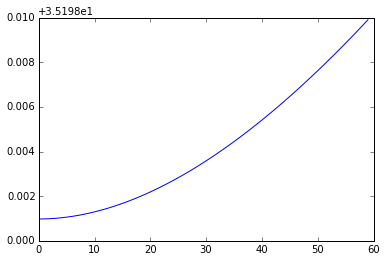

In [468]:
plt.plot(mse_by_alpha)